In [92]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
plt.rc('font', family = 'Malgun Gothic')
warnings.filterwarnings('ignore')

# 1. 데이터 확인

| #  | 테이블명            | 테이블 설명                         | 주요컬럼                                              | 비고                            |
|----|------------------|--------------------------------|--------------------------------------------------|-------------------------------|
| 1  | trial_register  | 3일체험 신청                      | 유저id, 3일체험신청일시                               | 3일 체험은 유저 당 1회만 제공         |
| 2  | trial_visit_info | 3일체험 신청자 일자별 방문기록         | 유저id, 날짜, 지점id, 최초입실시각, 최종퇴실시각, 체류시간 |                                  |
| 3  | trial_access_log | 3일체험 신청자 출입기록             | 유저id, 지점id, timestamp, 출입방향                 |                                  |
| 4  | trial_payment   | 3일체험 신청자 결제 여부             | 유저id, 결제여부                                    |                                  |
| 5  | site_area       | 지점별 면적                        | 지점id, 지점 면적                                    |                                  |


In [2]:
site_area = pd.read_csv('./data/site_area.csv')
trial_access_log = pd.read_csv('./data/trial_access_log.csv')
trial_payment = pd.read_csv('./data/trial_payment.csv')
trial_register = pd.read_csv('./data/trial_register.csv')
trial_visit_info = pd.read_csv('./data/trial_visit_info.csv')

#### 1. site_area: 지점별 면적 데이터

In [3]:
site_area.T

,0,1,2,3,4,5,6,7,8
site_id,1,2,3,4,5,6,17,47,49
area_pyeong,50,100,150,100,150,150,50,50,50


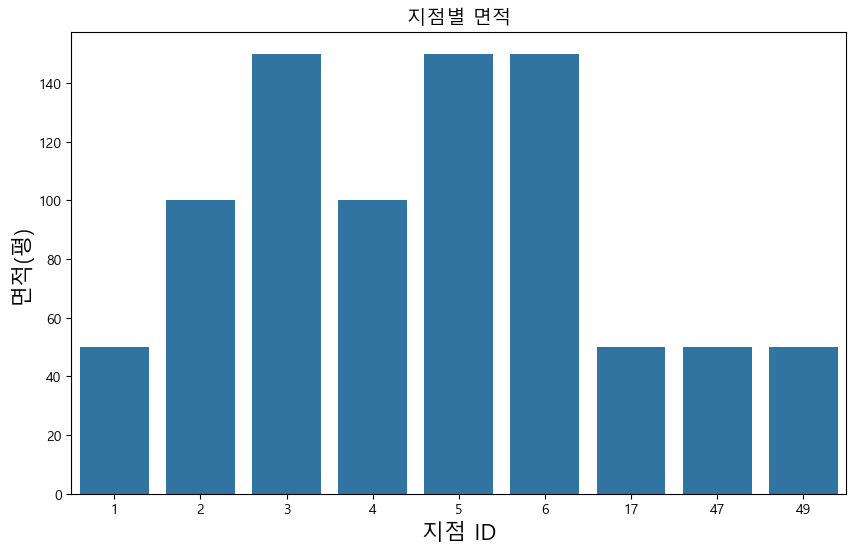

In [4]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x="site_id", y="area_pyeong", data = site_area)

# 그래프 제목 및 라벨 설정
plt.title("지점별 면적", fontsize=14)
plt.xlabel("지점 ID", fontsize=16)
plt.ylabel("면적(평)", fontsize=16)

# 그래프 표시
plt.show()

- 아주 단순하게 시각화하기 보단 다른 컬럼들이랑 병합해서 시각화할 것들이 있지 않을까? 

#### 2. trial_register: 3일 체험 신청자 데이터

In [5]:
# 시간순 정렬하기
trial_register = trial_register.sort_values('trial_date')
# datetime 변환환
trial_register['trial_date'] = pd.to_datetime(trial_register['trial_date'])
trial_register

,trial_date,user_uuid
428,2021-05-01,f25078d1-1030-485c-85c5-dc82d6987043
431,2021-05-01,9f5e2bd3-65c9-4800-84c1-f5c93f44d096
429,2021-05-01,844319ff-cd15-4633-9900-6eaf4dc68b68
427,2021-05-01,badbde4d-886b-4992-a8e3-fd0c05640183
426,2021-05-01,fce967b5-070c-46ed-a5fa-ef7d298cc7aa
...,...,...
96,2023-12-30,164b86b4-1b91-4b34-80b7-5bd04ab6c425
99,2023-12-31,acf3e288-4487-492b-9477-df149fb72e83
100,2023-12-31,acf3e288-4487-492b-9477-df149fb72e83
101,2023-12-31,0e58ea5a-ebe4-48cb-b31b-d02a4f350cf8


In [6]:
trial_register.isna().sum()

trial_date    0
user_uuid     0
dtype: int64

- 결측치 없음

In [7]:
# 전체 컬럼 기준 중복 확인하기 
print(trial_register.duplicated().sum())
# 전체 컬럼 기준 중복 제거하기: 전산오류 
trial_register = trial_register.drop_duplicates()
# 중복 제거됐는지 확인하기 
print(trial_register.duplicated().sum())

28
0


- 전산 오류로 중복 존재 > 제거처리

In [8]:
# 'user_uuid'기준 중복 확인하기 > 실제로 사용한 이용권은 나중의 데이터 
trial_register[trial_register['user_uuid'].duplicated(keep = False)]

,trial_date,user_uuid
835,2021-06-16,ffd880d5-0200-44e1-91db-7df9483f2a39
836,2021-06-28,ffd880d5-0200-44e1-91db-7df9483f2a39
1682,2021-09-06,4008307f-486f-408f-b90b-e01398972029
3462,2021-10-28,bf620970-e3f2-4b54-9620-86171299d08b
5624,2022-01-28,14872783-3af7-492a-b51c-12f3003b76f1
3461,2022-03-04,bf620970-e3f2-4b54-9620-86171299d08b
3554,2022-03-14,5b16f32b-3344-4b39-b2bf-8cf1caac78fa
1683,2022-03-25,4008307f-486f-408f-b90b-e01398972029
4674,2022-08-02,bd3ed6c2-f139-4e0c-b53e-b956101b2822
4968,2022-09-05,6a88014b-fbbd-4e73-8036-04435c062a97


In [9]:
# 'user_uuid'기준 중복 제거 > 최종 이용 데이터만 남기기
trial_register = trial_register.drop_duplicates(subset = 'user_uuid', keep = 'last')
# 중복 제거 확인하기 
trial_register[trial_register['user_uuid'].duplicated(keep = False)]

,trial_date,user_uuid


In [10]:
trial_register

,trial_date,user_uuid
428,2021-05-01,f25078d1-1030-485c-85c5-dc82d6987043
431,2021-05-01,9f5e2bd3-65c9-4800-84c1-f5c93f44d096
429,2021-05-01,844319ff-cd15-4633-9900-6eaf4dc68b68
427,2021-05-01,badbde4d-886b-4992-a8e3-fd0c05640183
426,2021-05-01,fce967b5-070c-46ed-a5fa-ef7d298cc7aa
...,...,...
90,2023-12-30,e9b1a5df-d70c-4ccf-af22-64fdae98d3a2
96,2023-12-30,164b86b4-1b91-4b34-80b7-5bd04ab6c425
99,2023-12-31,acf3e288-4487-492b-9477-df149fb72e83
101,2023-12-31,0e58ea5a-ebe4-48cb-b31b-d02a4f350cf8


> 중복 제거 후 데이터 수 변화: 9659 > 9624 

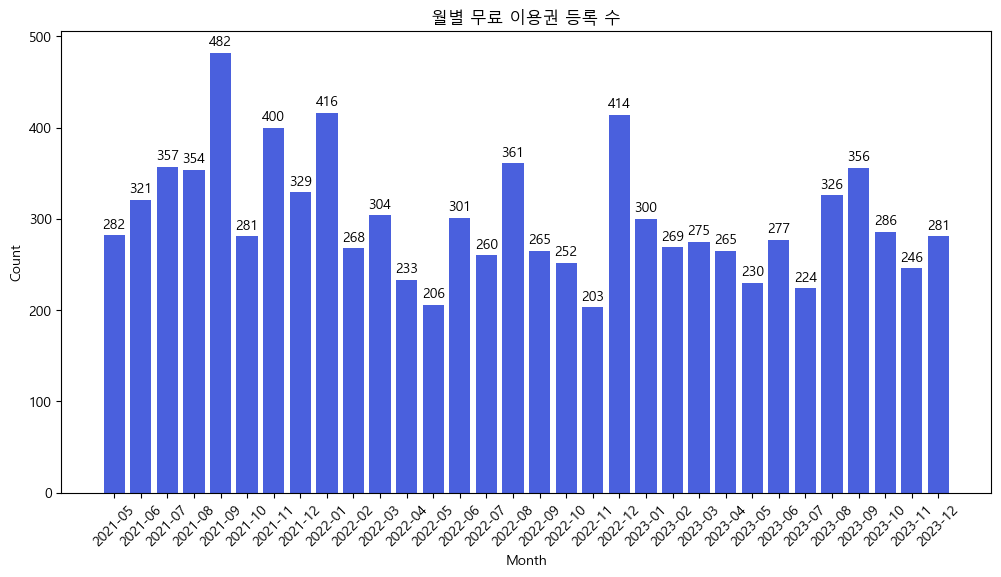

In [11]:
# 월별 count 계산
trial_register['year_month'] = trial_register['trial_date'].dt.to_period('M')  # YYYY-MM 형식
monthly_counts = trial_register['year_month'].value_counts().sort_index()

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(monthly_counts.index.astype(str), monthly_counts.values, color='#4a60dd')  # 막대 색상 설정
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('월별 무료 이용권 등록 수')
ax.set_xticklabels(monthly_counts.index.astype(str), rotation=45)  # X축 라벨 회전

# 각 막대 위에 값 표시
ax.bar_label(bars, fmt='%.0f', padding=3)

plt.show()

In [12]:
data = {
    '신청일자': [
        '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', 
        '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', 
        '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', 
        '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', 
        '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', 
        '2023-11', '2023-12'
    ],
    '신청자수': [
        282, 321, 357, 354, 482, 281,
        400, 329, 416, 268, 304, 233,
        206, 301, 260, 361, 265, 252,
        203, 414, 300, 269, 275, 265,
        230, 277, 224, 326, 356, 286,
        246, 281
    ]
}

df = pd.DataFrame(data)

# 날짜 타입으로 변환 (그래프에서 깔끔하게 보이도록)
df['신청일자'] = pd.to_datetime(df['신청일자'], format='%Y-%m')

# 3개월 이동평균 추가
df['3개월_이동평균'] = df['신청자수'].rolling(window=3).mean()


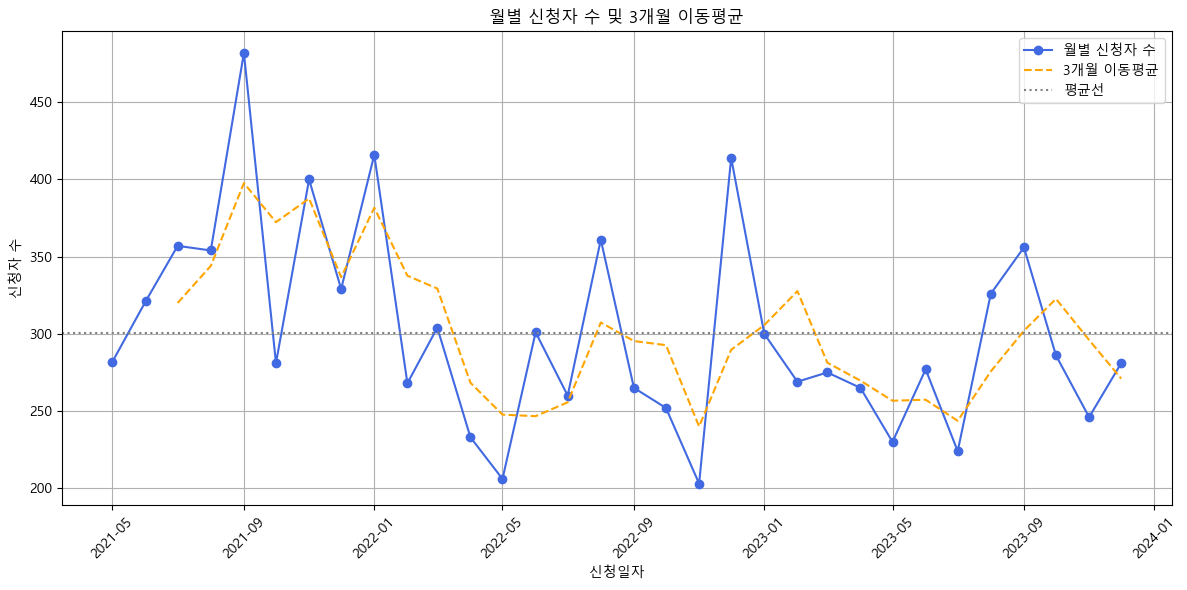

In [13]:
plt.figure(figsize=(12, 6))

# 원 데이터 라인
plt.plot(df['신청일자'], df['신청자수'], label='월별 신청자 수', marker='o', color='royalblue')

# 3개월 이동평균 라인
plt.plot(df['신청일자'], df['3개월_이동평균'], label='3개월 이동평균', linestyle='--', color='orange')

# 그래프 설정
plt.axhline(y=df['신청자수'].mean(), color='gray', linestyle=':', label='평균선')  # 전체 평균선 추가
plt.title('월별 신청자 수 및 3개월 이동평균')
plt.xlabel('신청일자')
plt.ylabel('신청자 수')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

- 코로나 방침이 완화되던 22.05 시점부터 감소한 채로 유지됨. 

In [14]:
monthly_counts.mean()

300.75

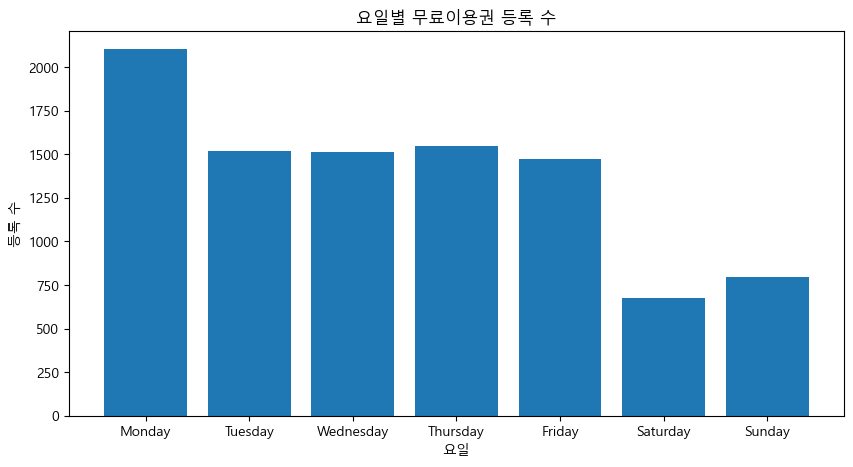

In [15]:
# trial_date가 datetime 형식이므로 요일 추출
trial_register['day_of_week'] = trial_register['trial_date'].dt.day_name()

# 요일별 count 계산 (순서 정렬)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = trial_register['day_of_week'].value_counts().reindex(day_order)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(weekday_counts.index, weekday_counts.values)
plt.xlabel('요일')
plt.ylabel('등록 수')
plt.title('요일별 무료이용권 등록 수')
plt.show()


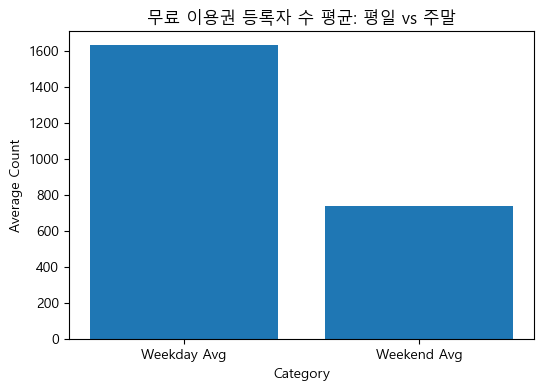

평일 평균: 1630.20
주말 평균: 736.50


In [16]:
# trial_date에서 요일 추출 후 평일/주말 분류
trial_register['is_weekend'] = trial_register['trial_date'].dt.weekday >= 5  # 5(토), 6(일) → True

# 요일별 count 계산
weekday_counts = trial_register['day_of_week'].value_counts()

# 평일과 주말 평균 계산
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

weekday_avg = weekday_counts[weekdays].mean()  # 평일 평균
weekend_avg = weekday_counts[weekends].mean()  # 주말 평균

# 시각화
plt.figure(figsize=(6, 4))
plt.bar(['Weekday Avg', 'Weekend Avg'], [weekday_avg, weekend_avg])
plt.xlabel('Category')
plt.ylabel('Average Count')
plt.title('무료 이용권 등록자 수 평균: 평일 vs 주말')
plt.show()

# 출력 확인
print(f"평일 평균: {weekday_avg:.2f}")
print(f"주말 평균: {weekend_avg:.2f}")



#### 3. trial_payment: 유료 전환 여부 

In [17]:
trial_payment

,is_payment,user_uuid
0,0,2b251333-8676-4c11-a736-dcf2350f8821
1,0,e111619a-0975-451b-9a4a-bc8aea7b7b84
2,1,4a184795-b056-4572-a874-644f68609ea3
3,0,2ba8ab19-2d40-4423-ad04-f0f9ca814871
4,0,1d49ba36-6c23-405b-9514-aa7f4aeceff0
...,...,...
9654,0,d7599df4-1e5a-4f5e-97ce-c42047bfd87c
9655,0,43263092-3b28-4817-9fa9-4205ad3097fe
9656,0,51a40f33-1027-4544-9b95-45bca7c104fb
9657,0,3e649531-bf5b-4b99-84e5-ca3e0e647d0c


In [18]:
# 결측치 확인하기: 없음
trial_payment.isna().sum()

is_payment    0
user_uuid     0
dtype: int64

In [19]:
# 전체 컬럼 기준 중복 확인하기 
print(trial_payment.duplicated().sum())
# user_uuid 기준 중복 확인하기 
print(trial_payment['user_uuid'].duplicated().sum())

35
35


In [20]:
# 전체 컬럼 기준 중복 제거하기: 다른 컬럼이 없어서 중복 유지할 이유가 없음
trial_payment = trial_payment.drop_duplicates()
# 중복 제거 확인하기
print(trial_payment.duplicated().sum())
# 중복 제거 후 데이터 갯수 
print(len(trial_payment))

0
9624


> 중복 제거 후 데이터 수 변화: 9659 > 9624 
- trial_payment와 trial_register 수가 정확히 일치한다. 
- 정보가 누락없이 동일하게 잘 들어있는 듯

##### 3-1 전환율

In [21]:
trial_payment['is_payment'].value_counts()

is_payment
0    5972
1    3652
Name: count, dtype: int64

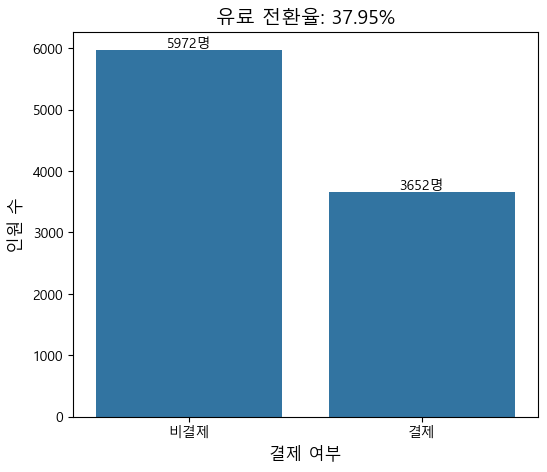

In [22]:
# 전환율 계산
conversion_rate = trial_payment["is_payment"].mean() * 100  # 1의 비율을 계산

# 시각화
plt.figure(figsize=(6, 5))
ax = sns.countplot(x="is_payment", data=trial_payment) #palette=["lightcoral", "skyblue"]
plt.title(f"유료 전환율: {conversion_rate:.2f}%", fontsize=14)
plt.xlabel("결제 여부", fontsize=12)
plt.ylabel("인원 수", fontsize=12)

# 막대에 값 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}명', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.xticks([0, 1], ["비결제", "결제"])  # X축 라벨 변경
plt.show()

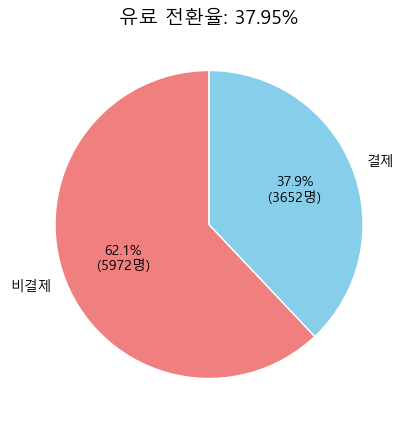

In [23]:
# 전환율 계산
total_users = len(trial_payment)
payment_users = trial_payment["is_payment"].sum()
conversion_rate = (payment_users / total_users) * 100

# 데이터 수 
non_payment_users = total_users - payment_users

# 시각화
plt.figure(figsize=(6, 5))
labels = ["비결제", "결제"]
sizes = [non_payment_users, payment_users]
colors = ["lightcoral", "skyblue"]

# 라벨 커스터마이징 함수 (퍼센티지 + 실제 데이터 수 표시)
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))  # 실제 수치 계산
        return f"{pct:.1f}%\n({count}명)"       # 퍼센티지 + 실제 수
    return my_autopct

plt.pie(sizes, labels=labels, autopct=make_autopct(sizes), colors=colors, startangle=90, wedgeprops={"edgecolor": "white"})
plt.title(f"유료 전환율: {conversion_rate:.2f}%", fontsize=14)
plt.show()


In [24]:
import plotly.express as px 
# 퍼널 데이터 생성
stages = ["무료 이용권 사용", "유료 결제 전환"]
counts = [len(trial_payment), trial_payment["is_payment"].sum()]

# Plotly 퍼널 차트 생성
df_funnel = pd.DataFrame({"Stage": stages, "Users": counts})
title_text = f"유료 전환율({conversion_rate:.2f}%)"
fig = px.funnel(df_funnel, x="Users", y="Stage", title = title_text)
fig.show()

In [25]:
import plotly.graph_objects as go

# 데이터 준비
stages = ["무료 이용권 사용", "유료 결제 전환"]
counts = [len(trial_payment), trial_payment["is_payment"].sum()]
percentages = [100, (counts[1] / counts[0]) * 100]

# 라벨 텍스트 만들기 (수 + 비율 같이 표시)
custom_labels = [
    f"{counts[0]}명 (100%)",
    f"{counts[1]}명 ({percentages[1]:.2f}%)"
]

# 퍼널 차트 생성
fig = go.Figure(go.Funnel(
    y=stages,
    x=counts,
    textinfo="text",  # 기본 텍스트 제거
    text=custom_labels  # 직접 만든 커스텀 텍스트 사용
))

fig.update_layout(title_text=f"유료 전환율({conversion_rate:.2f}%)")
fig.show()


#### 4. trial_visit_info: 3일 체험 신청자 일자별 방문기록


In [26]:
trial_visit_info.head()

,site_id,date,stay_time,stay_time_second,first_enter_time,last_leave_time,user_uuid
0,1,2023-12-23,01:11:19.983486,4279,2023-12-23 16:11:25.345793,2023-12-23 17:25:32.233995,939fc566-61cd-47f0-a3ce-e2936fdcff73
1,1,2023-12-24,04:35:10.361341,16510,2023-12-24 16:10:45.668026,2023-12-24 20:53:34.842447,939fc566-61cd-47f0-a3ce-e2936fdcff73
2,1,2023-12-25,02:09:54.117163,7794,2023-12-25 10:19:47.087268,2023-12-25 12:39:51.221372,939fc566-61cd-47f0-a3ce-e2936fdcff73
3,1,2023-12-23,04:37:36.134901,16656,2023-12-23 14:49:40.302823,2023-12-23 19:27:39.406803,ba49324f-d317-4053-adf9-2b17b3f07594
4,3,2023-12-26,04:32:05.289251,16325,2023-12-26 14:57:10.220793,2023-12-26 19:34:36.971542,ba49324f-d317-4053-adf9-2b17b3f07594


- 한 명의 유저가 여러 개의 지점을 사용한다. 

In [27]:
trial_visit_info.columns

Index(['site_id', 'date', 'stay_time', 'stay_time_second', 'first_enter_time',
       'last_leave_time', 'user_uuid'],
      dtype='object')

In [28]:
# datetime/timedelta 타입 변환
trial_visit_info['date'] = pd.to_datetime(trial_visit_info['date']) 
trial_visit_info["stay_time"] = pd.to_timedelta(trial_visit_info["stay_time"])
trial_visit_info['first_enter_time'] = pd.to_datetime(trial_visit_info['first_enter_time'], format="ISO8601")
trial_visit_info['last_leave_time'] = pd.to_datetime(trial_visit_info['last_leave_time'], format="ISO8601") 

# 지점 id 문자열로 변환
trial_visit_info["site_id"] = trial_visit_info["site_id"].astype(str)

print(trial_visit_info.dtypes)

site_id                      object
date                 datetime64[ns]
stay_time           timedelta64[ns]
stay_time_second              int64
first_enter_time     datetime64[ns]
last_leave_time      datetime64[ns]
user_uuid                    object
dtype: object


In [29]:
trial_visit_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   site_id           11477 non-null  object         
 1   date              11477 non-null  datetime64[ns] 
 2   stay_time         11477 non-null  timedelta64[ns]
 3   stay_time_second  11477 non-null  int64          
 4   first_enter_time  10922 non-null  datetime64[ns] 
 5   last_leave_time   10922 non-null  datetime64[ns] 
 6   user_uuid         11477 non-null  object         
dtypes: datetime64[ns](3), int64(1), object(2), timedelta64[ns](1)
memory usage: 627.8+ KB


In [30]:
# 결측치는 우선 제거
trial_visit_info = trial_visit_info.dropna(subset=["first_enter_time", "last_leave_time"])

In [31]:
trial_visit_info = trial_visit_info.drop_duplicates()

In [32]:
trial_visit_info.duplicated().sum()

0

In [33]:
trial_visit_info[trial_visit_info[['date','user_uuid']].duplicated(keep = False)]

,site_id,date,stay_time,stay_time_second,first_enter_time,last_leave_time,user_uuid
159,47,2023-12-30,0 days 01:19:43.539546,4783,2023-12-30 00:00:00.000000,2023-12-30 01:23:41.677938,4ba37b4f-1239-4107-8f03-395dff5da4b8
160,47,2023-12-30,0 days 03:45:37.021211,13537,2023-12-30 17:53:38.746420,2023-12-30 22:07:14.091749,4ba37b4f-1239-4107-8f03-395dff5da4b8
191,1,2023-09-14,0 days 04:00:01.945570,14401,2023-09-14 12:30:53.611333,2023-09-14 16:38:42.256486,1ed6aa8a-05ed-48fc-8169-0179e6b1148b
192,17,2023-09-14,0 days 03:24:51.534347,12291,2023-09-14 07:32:43.631260,2023-09-14 11:08:35.353030,1ed6aa8a-05ed-48fc-8169-0179e6b1148b
214,1,2021-12-05,0 days 04:46:27.853557,17187,2021-12-05 09:52:01.872800,2021-12-05 14:41:45.116059,478446b4-04f4-4853-8db2-88752073fa04
...,...,...,...,...,...,...,...
11200,17,2022-08-08,0 days 00:01:24.849207,84,2022-08-08 14:27:38.316624,2022-08-08 14:29:03.165831,ff6e0156-baf4-479e-9f91-093839d5f22a
11202,1,2022-04-02,0 days 01:25:03.204235,5103,2022-04-02 16:04:02.849315,2022-04-02 17:29:06.053550,3533164f-1c7b-4432-a8ff-96f0a1c0ce00
11203,3,2022-04-02,0 days 00:59:09.125067,3549,2022-04-02 18:21:56.371644,2022-04-02 19:23:56.768004,3533164f-1c7b-4432-a8ff-96f0a1c0ce00
11409,6,2022-08-08,0 days 07:23:07.919950,26587,2022-08-08 11:15:39.216110,2022-08-08 19:44:43.952987,c1f2194a-45a5-4421-b5f5-c806f6c4bfb6


- 같은 날 다른 지점을 이용한 사용자도 있다. 
- 같은 날 같은 지점 두 번 입퇴실한 사용자도 있다. 
- 입퇴실 기록과 단순 출입 기록은 별개인 듯하다. 

In [34]:
trial_visit_info[trial_visit_info[['date','user_uuid','site_id']].duplicated(keep = False)]

,site_id,date,stay_time,stay_time_second,first_enter_time,last_leave_time,user_uuid
159,47,2023-12-30,0 days 01:19:43.539546,4783,2023-12-30 00:00:00.000000,2023-12-30 01:23:41.677938,4ba37b4f-1239-4107-8f03-395dff5da4b8
160,47,2023-12-30,0 days 03:45:37.021211,13537,2023-12-30 17:53:38.746420,2023-12-30 22:07:14.091749,4ba37b4f-1239-4107-8f03-395dff5da4b8
239,1,2021-12-03,0 days 03:45:52.640425,13552,2021-12-03 15:45:58.132856,2021-12-03 19:36:21.634657,66672cfc-4c59-43ad-a407-d496c16836f7
240,1,2021-12-03,0 days 02:59:58.954692,10798,2021-12-03 10:29:28.361443,2021-12-03 13:29:27.316135,66672cfc-4c59-43ad-a407-d496c16836f7
639,2,2023-10-29,0 days 13:58:52.136059,50332,2023-10-29 07:40:28.795745,2023-10-29 23:13:21.935218,e6bf43d9-9688-4c71-9979-be67f96aa3c9
...,...,...,...,...,...,...,...
8714,6,2023-03-08,0 days 08:04:41.564086,29081,2023-03-08 09:00:26.858832,2023-03-08 17:53:19.997614,137c3861-59a4-4ed4-aa06-e00118950edc
8790,47,2023-03-03,0 days 06:23:16.376296,22996,2023-03-03 10:33:00.794992,2023-03-03 17:48:09.387323,57e0e444-ad05-4d0b-b044-19ce05cf462c
8791,47,2023-03-03,0 days 02:55:50.528616,10550,2023-03-03 19:44:48.953115,2023-03-03 22:40:39.481731,57e0e444-ad05-4d0b-b044-19ce05cf462c
9708,6,2023-03-03,0 days 04:51:34.789623,17494,2023-03-03 13:29:20.525888,2023-03-03 18:23:22.801149,ee898357-c4bc-40a1-b260-ac0f2278da8f


In [35]:
trial_visit_info.sort_values(by = ['user_uuid','date']).head(20)

,site_id,date,stay_time,stay_time_second,first_enter_time,last_leave_time,user_uuid
9815,6,2023-09-05,0 days 05:56:57.911500,21417,2023-09-05 11:57:01.148452,2023-09-05 17:59:45.443621,000590dc-046f-462b-8225-4c81a97b7166
3065,3,2021-09-30,0 days 02:50:22.792298,10222,2021-09-30 16:31:14.683437,2021-09-30 20:25:41.659501,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c
3064,3,2021-10-01,0 days 02:36:22.675157,9382,2021-10-01 19:30:20.712177,2021-10-01 22:08:58.748107,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c
3063,3,2021-10-02,0 days 07:12:45.416845,25965,2021-10-02 13:41:08.211652,2021-10-02 22:20:02.600559,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c
11119,6,2023-11-15,0 days 11:55:00.345584,42900,2023-11-15 09:44:07.947297,2023-11-15 21:47:12.944689,0018e22d-a2cc-4e06-bca2-d6a041770f3b
11120,6,2023-11-16,0 days 09:34:32.980459,34472,2023-11-16 09:04:41.057302,2023-11-16 18:39:26.385388,0018e22d-a2cc-4e06-bca2-d6a041770f3b
10411,17,2023-01-07,0 days 03:31:29.792957,12689,2023-01-07 17:25:54.220112,2023-01-07 20:59:25.463866,002606d9-38ca-48f3-910c-cbfada9a9109
10412,17,2023-01-08,0 days 03:25:35.466525,12335,2023-01-08 15:57:19.474364,2023-01-08 19:24:53.532901,002606d9-38ca-48f3-910c-cbfada9a9109
3364,5,2021-09-08,0 days 05:12:02.172958,18722,2021-09-08 16:37:24.278794,2021-09-08 22:25:09.935393,002a7570-90dd-4cab-b0aa-b0e40f7ef27a
3363,5,2021-09-10,0 days 01:21:27.035658,4887,2021-09-10 17:03:36.045707,2021-09-10 18:25:03.081365,002a7570-90dd-4cab-b0aa-b0e40f7ef27a


In [36]:
trial_visit_info['stay_time_hour']= trial_visit_info["stay_time_second"] / 3600
# 체류시간(시간)은 반올림하여 시간으로 처리
# 소수 반올림하여 정수 변환
trial_visit_info["stay_time_hour"] = trial_visit_info["stay_time_hour"].round().astype(int)

우선 입실 시간대 분포

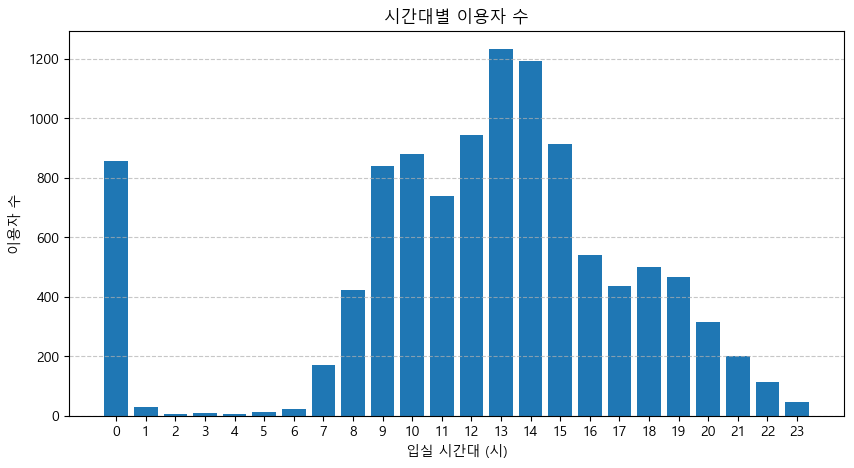

In [37]:
# first_enter_time에서 시간만 추출하여 새로운 컬럼 생성
trial_visit_info["enter_hour"] = trial_visit_info["first_enter_time"].dt.hour

# 시간대별 방문자 수 계산
hourly_visits = trial_visit_info["enter_hour"].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.bar(hourly_visits.index, hourly_visits.values)
plt.xlabel("입실 시간대 (시)")
plt.ylabel("이용자 수")
plt.title("시간대별 이용자 수")
plt.xticks(range(24))  # 0~23시간 표시
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [38]:
hourly_visits

enter_hour
0      856
1       28
2        6
3        9
4        6
5       11
6       21
7      169
8      422
9      838
10     878
11     737
12     942
13    1232
14    1193
15     912
16     539
17     436
18     501
19     466
20     314
21     199
22     112
23      47
Name: count, dtype: int64

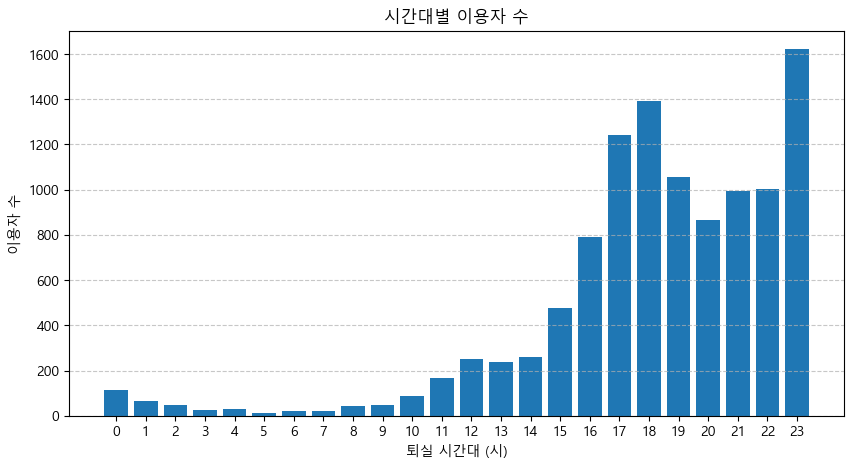

In [39]:
# 퇴실 시간대 분포
# first_enter_time에서 시간만 추출하여 새로운 컬럼 생성
trial_visit_info["leave_hour"] = trial_visit_info["last_leave_time"].dt.hour

# 시간대별 방문자 수 계산
hourly_visits = trial_visit_info["leave_hour"].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.bar(hourly_visits.index, hourly_visits.values)
plt.xlabel("퇴실 시간대 (시)")
plt.ylabel("이용자 수")
plt.title("시간대별 이용자 수")
plt.xticks(range(24))  # 0~23시간 표시
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [40]:
hourly_visits

leave_hour
0      115
1       67
2       46
3       27
4       28
5       14
6       20
7       19
8       45
9       46
10      89
11     165
12     253
13     238
14     259
15     478
16     790
17    1243
18    1391
19    1058
20     865
21     992
22    1004
23    1622
Name: count, dtype: int64

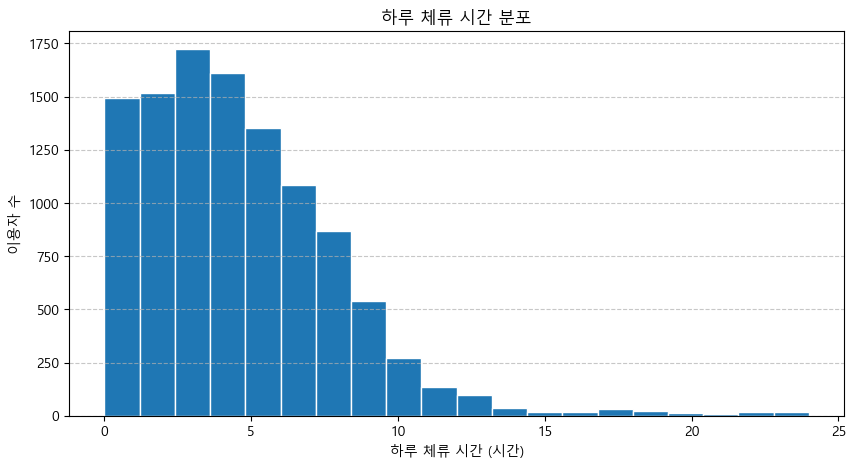

In [41]:
# 하루 체류 시간 분포 (시간 단위 변환)
plt.figure(figsize=(10, 5))
plt.hist(trial_visit_info["stay_time_second"] / 3600, bins=20,  edgecolor="white")
plt.xlabel("하루 체류 시간 (시간)")
plt.ylabel("이용자 수")
plt.title("하루 체류 시간 분포")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [42]:
# 입실시간대별 평균 체류 시간 계산 (초 → 시간 변환)
site_hourly_stay = trial_visit_info.groupby(["site_id", "enter_hour"])["stay_time_second"].mean().unstack(fill_value=0) / 3600
site_hourly_stay

enter_hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
site_id,,,,,,,,,,,,,,,,,,,,,,,,
1,10.896569,3.920694,0.000000,0.000000,0.000000,5.263472,13.085000,5.896296,6.284823,5.550035,5.294313,4.407179,4.552894,4.394334,3.715359,3.296605,2.758156,2.462161,2.250873,1.922074,2.038489,1.027381,1.127083,0.356667
17,6.419051,2.321389,0.000000,0.000000,0.000000,2.045694,0.000000,4.633727,4.605220,5.775765,4.654949,4.270579,4.154389,3.836903,4.088745,2.881366,2.306982,2.519434,2.446095,2.894150,2.255109,1.725366,1.190069,0.464643
2,7.645715,9.748333,0.000000,2.908611,5.337083,0.000000,6.485926,6.996174,7.996340,7.120094,6.700254,6.311624,5.725484,5.271112,4.829936,4.324788,3.573270,3.481538,2.694938,2.592520,1.959100,2.010384,1.106959,0.573697
3,7.698111,6.995417,5.701111,1.202778,1.120000,0.000000,5.098796,8.302239,7.366080,6.422811,5.812040,5.787375,5.003820,4.911464,3.955617,3.893836,3.497460,3.107784,3.213695,2.415269,1.949289,1.821958,1.112632,0.479043
4,7.024302,0.944167,0.000000,7.922222,0.000000,4.695833,0.000000,7.512523,6.827007,6.066897,4.828820,4.929616,4.520741,4.203489,3.755258,3.448944,2.802929,2.637457,2.522663,2.146491,1.879853,1.669762,1.349722,0.886389
47,5.917683,5.411296,0.000000,0.000000,0.000000,0.000000,1.657083,5.642278,6.650278,4.952572,5.183683,4.544343,4.829156,4.721155,3.668289,3.673321,3.002768,2.615475,2.379933,2.402860,2.132153,1.450444,1.113796,0.017778
49,5.478410,6.054833,2.476667,4.380556,3.634722,0.000000,5.070694,3.363889,4.134861,6.115705,5.762958,4.307692,4.233173,3.892939,3.739019,4.063099,2.662500,3.041142,2.107326,1.573935,2.323743,1.805208,1.341722,0.138333
5,6.441731,1.650833,4.496667,1.596250,0.000000,13.320833,0.000000,4.875448,6.444607,6.232133,5.291621,5.482344,5.476450,4.999020,4.119725,3.740372,3.206508,2.431240,2.973098,2.287451,1.805437,1.202302,1.158426,0.687063
6,6.958811,5.032917,0.000000,1.230278,11.546667,7.473056,5.334028,4.968188,7.213493,6.098236,5.954709,5.945405,5.460847,5.077349,4.287234,3.807084,3.095809,2.999922,2.532822,2.431876,2.121641,1.680251,1.185926,0.397222


In [43]:
basic_info = trial_visit_info.describe()
basic_info

,date,stay_time,stay_time_second,first_enter_time,last_leave_time,stay_time_hour,enter_hour,leave_hour
count,10874,10874,10874.000000,10874,10874,10874.000000,10874.000000,10874.000000
mean,2022-09-28 18:34:45.709030912,0 days 04:38:09.378665925,16688.879437,2022-09-29 07:26:37.778031616,2022-09-29 13:16:12.149186048,4.642818,12.403347,18.164153
min,2021-06-30 00:00:00,0 days 00:00:01.838525,1.000000,2021-06-30 00:00:00,2021-06-30 16:10:57.637607,0.000000,0.000000,0.000000
25%,2022-01-21 00:00:00,0 days 02:09:36.667037750,7776.250000,2022-01-21 19:20:34.827705856,2022-01-21 22:41:23.801270784,2.000000,10.000000,17.000000
50%,2022-10-01 00:00:00,0 days 04:05:49.590629,14749.000000,2022-10-01 13:54:15.575832576,2022-10-01 21:01:38.140920064,4.000000,13.000000,19.000000
75%,2023-06-06 00:00:00,0 days 06:29:26.027731,23365.500000,2023-06-06 10:16:00.191004672,2023-06-06 13:46:44.857959936,6.000000,15.000000,21.000000
max,2024-01-02 00:00:00,0 days 23:59:37.348440,86377.000000,2024-01-02 19:37:50.345305,2024-01-02 20:20:08.337566,24.000000,23.000000,23.000000
std,NaN,0 days 03:18:25.077565620,11905.075804,NaN,NaN,3.315123,5.059809,4.365235


In [44]:
basic_info.drop(['date','first_enter_time','last_leave_time','stay_time_second','stay_time_hour'], axis = 1)

,stay_time,enter_hour,leave_hour
count,10874,10874.000000,10874.000000
mean,0 days 04:38:09.378665925,12.403347,18.164153
min,0 days 00:00:01.838525,0.000000,0.000000
25%,0 days 02:09:36.667037750,10.000000,17.000000
50%,0 days 04:05:49.590629,13.000000,19.000000
75%,0 days 06:29:26.027731,15.000000,21.000000
max,0 days 23:59:37.348440,23.000000,23.000000
std,0 days 03:18:25.077565620,5.059809,4.365235


- 유료 전환여부를 trial_visit_info 에 병합하려고 함.

In [45]:
trial_visit_info['user_uuid'].nunique()
# 유저가 6207명 뿐이다. 
# 무료 이용권을 신청만 하고 사용 안한 사람도 있고, 결측치를 제거해서 그런 듯
# 그럼 아까 퍼널 분석에서 
# 무료 이용권 신청 > 실사용 > 유료 전환 을 찍을 수 있겠구나
# 데이터셋을 visit_info 유저랑, 유료전환이랑 합쳐서 봐야겠네 오 이건 나중에 

6207

In [46]:
# 유료 여부 조인하기 
# user_uuid를 기준으로 왼쪽 조인(Left Join)
trial_visit_info = trial_visit_info.merge(trial_payment, on="user_uuid", how="left")
trial_visit_info

,site_id,date,stay_time,stay_time_second,first_enter_time,last_leave_time,user_uuid,stay_time_hour,enter_hour,leave_hour,is_payment
0,1,2023-12-23,0 days 01:11:19.983486,4279,2023-12-23 16:11:25.345793,2023-12-23 17:25:32.233995,939fc566-61cd-47f0-a3ce-e2936fdcff73,1,16,17,1
1,1,2023-12-24,0 days 04:35:10.361341,16510,2023-12-24 16:10:45.668026,2023-12-24 20:53:34.842447,939fc566-61cd-47f0-a3ce-e2936fdcff73,5,16,20,1
2,1,2023-12-25,0 days 02:09:54.117163,7794,2023-12-25 10:19:47.087268,2023-12-25 12:39:51.221372,939fc566-61cd-47f0-a3ce-e2936fdcff73,2,10,12,1
3,1,2023-12-23,0 days 04:37:36.134901,16656,2023-12-23 14:49:40.302823,2023-12-23 19:27:39.406803,ba49324f-d317-4053-adf9-2b17b3f07594,5,14,19,1
4,3,2023-12-26,0 days 04:32:05.289251,16325,2023-12-26 14:57:10.220793,2023-12-26 19:34:36.971542,ba49324f-d317-4053-adf9-2b17b3f07594,5,14,19,1
...,...,...,...,...,...,...,...,...,...,...,...
10869,6,2022-06-16,0 days 06:47:59.975925,24479,2022-06-16 11:00:48.643935,2022-06-16 18:23:38.495290,766221e7-a753-444f-aa5a-ae76ce86d3fd,7,11,18,1
10870,6,2022-06-17,0 days 01:28:46.221537,5326,2022-06-17 17:15:05.221223,2022-06-17 18:56:00.840639,0a70277f-a7f9-401c-95fa-ed6d96ee32e0,1,17,18,1
10871,6,2022-06-16,0 days 05:08:03.166662,18483,2022-06-16 12:52:46.557742,2022-06-16 18:23:34.355309,0a70277f-a7f9-401c-95fa-ed6d96ee32e0,5,12,18,1
10872,6,2023-02-06,0 days 06:30:29.693768,23429,2023-02-06 10:14:00.538281,2023-02-06 16:52:37.606175,576473bb-0647-483e-b06a-a5ff6491b08b,7,10,16,1


In [47]:
trial_visit_info.head()

,site_id,date,stay_time,stay_time_second,first_enter_time,last_leave_time,user_uuid,stay_time_hour,enter_hour,leave_hour,is_payment
0,1,2023-12-23,0 days 01:11:19.983486,4279,2023-12-23 16:11:25.345793,2023-12-23 17:25:32.233995,939fc566-61cd-47f0-a3ce-e2936fdcff73,1,16,17,1
1,1,2023-12-24,0 days 04:35:10.361341,16510,2023-12-24 16:10:45.668026,2023-12-24 20:53:34.842447,939fc566-61cd-47f0-a3ce-e2936fdcff73,5,16,20,1
2,1,2023-12-25,0 days 02:09:54.117163,7794,2023-12-25 10:19:47.087268,2023-12-25 12:39:51.221372,939fc566-61cd-47f0-a3ce-e2936fdcff73,2,10,12,1
3,1,2023-12-23,0 days 04:37:36.134901,16656,2023-12-23 14:49:40.302823,2023-12-23 19:27:39.406803,ba49324f-d317-4053-adf9-2b17b3f07594,5,14,19,1
4,3,2023-12-26,0 days 04:32:05.289251,16325,2023-12-26 14:57:10.220793,2023-12-26 19:34:36.971542,ba49324f-d317-4053-adf9-2b17b3f07594,5,14,19,1


In [48]:
# CSV 파일로 저장 > 태블로 이용
trial_visit_info.to_csv("trial_visit_info_2.csv", index=False, encoding="utf-8-sig")

In [49]:
# 요일 정보 추출하여 새로운 열 'weekday'에 저장
trial_visit_info['weekday'] = trial_visit_info['date'].dt.day_name()

In [50]:
# CSV 파일로 저장 > 태블로 이용
trial_visit_info.to_csv("trial_visit_info_3.csv", index=False, encoding="utf-8-sig")

In [51]:
import pandas as pd

# user_uuid별 방문일수 구하기
visit_count = trial_visit_info.groupby('user_uuid')['date'].nunique().reset_index()
visit_count.columns = ['user_uuid', 'visit_dates_count']

# 각 방문일수별 유저 수 세기 (분포 구하기)
visit_distribution = visit_count['visit_dates_count'].value_counts().reset_index()
visit_distribution.columns = ['visit_dates_count', 'user_count']

# 방문일수 순으로 정렬
visit_distribution = visit_distribution.sort_values('visit_dates_count')

# 결과 출력
print(visit_distribution)


   visit_dates_count  user_count
0                  1        3049
1                  2        1836
2                  3        1247
3                  4          75


In [52]:
import pandas as pd

# 1. user_uuid별 방문한 날짜 수 (visit_dates_count) 구하기
visit_count = trial_visit_info.groupby('user_uuid')['date'].nunique().reset_index()
visit_count.columns = ['user_uuid', 'visit_dates_count']

# 2. user_uuid별 총 체류시간 (stay_time_second 합산) 구하기
stay_time_sum = trial_visit_info.groupby('user_uuid')['stay_time_second'].sum().reset_index()

# 3. 방문일수, 총 체류시간 정보 합치기
user_stats = pd.merge(visit_count, stay_time_sum, on='user_uuid')

# 4. 방문일수별 평균 체류시간 구하기
visit_time_distribution = user_stats.groupby('visit_dates_count')['stay_time_second'].mean().reset_index()
visit_time_distribution.columns = ['visit_dates_count', 'avg_stay_time_second']

# 5. 필요하면 시간 단위로 변환 (선택사항)
visit_time_distribution['avg_stay_time_hour'] = visit_time_distribution['avg_stay_time_second'] / 3600

# 결과 확인
print(visit_time_distribution)


   visit_dates_count  avg_stay_time_second  avg_stay_time_hour
0                  1          14094.389964            3.915108
1                  2          33164.149237            9.212264
2                  3          57756.136327           16.043371
3                  4          74530.666667           20.702963


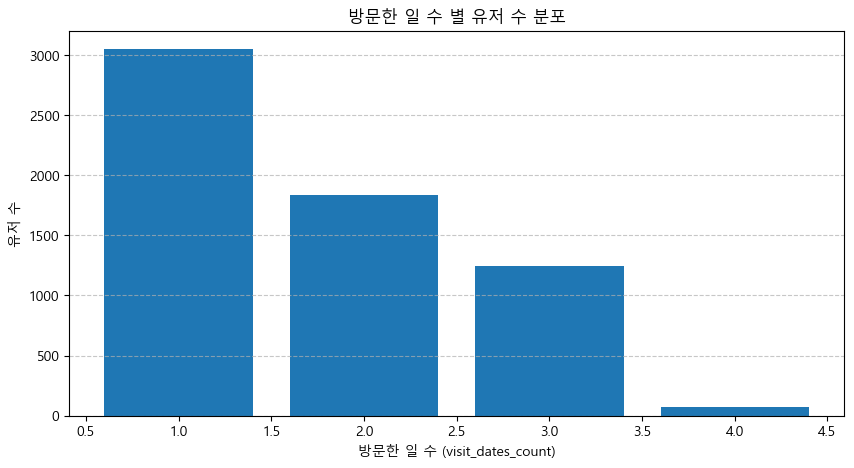

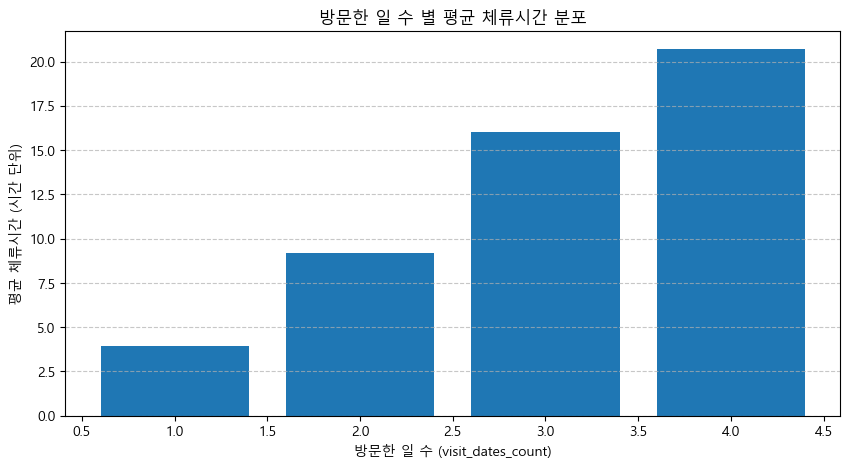

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비 과정 (이전 코드 합쳐서 정리)
visit_count = trial_visit_info.groupby('user_uuid')['date'].nunique().reset_index()
visit_count.columns = ['user_uuid', 'visit_dates_count']

stay_time_sum = trial_visit_info.groupby('user_uuid')['stay_time_second'].sum().reset_index()

user_stats = pd.merge(visit_count, stay_time_sum, on='user_uuid')

# 방문일수별 유저 수 분포
visit_distribution = visit_count['visit_dates_count'].value_counts().reset_index()
visit_distribution.columns = ['visit_dates_count', 'user_count']
visit_distribution = visit_distribution.sort_values('visit_dates_count')

# 방문일수별 평균 체류시간
visit_time_distribution = user_stats.groupby('visit_dates_count')['stay_time_second'].mean().reset_index()
visit_time_distribution.columns = ['visit_dates_count', 'avg_stay_time_second']
visit_time_distribution['avg_stay_time_hour'] = visit_time_distribution['avg_stay_time_second'] / 3600

# 1️⃣ 방문일수별 유저 수 분포 시각화
plt.figure(figsize=(10, 5))
plt.bar(visit_distribution['visit_dates_count'], visit_distribution['user_count'])
plt.xlabel('방문한 일 수 (visit_dates_count)')
plt.ylabel('유저 수')
plt.title('방문한 일 수 별 유저 수 분포')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2️⃣ 방문일수별 평균 체류시간 시각화
plt.figure(figsize=(10, 5))
plt.bar(visit_time_distribution['visit_dates_count'], visit_time_distribution['avg_stay_time_hour'])
plt.xlabel('방문한 일 수 (visit_dates_count)')
plt.ylabel('평균 체류시간 (시간 단위)')
plt.title('방문한 일 수 별 평균 체류시간 분포')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> 전환율 다시 찍기 
- 무료 이용권 등록 > 무료 이용권 사용 > 유료 결제 
- 무료 이용권 등록 > 무료 이용권 비사용 > 유료 결제
- register 수 > visit_info 수 > 유료결제자 수
- register 수 > visit_info 제외한 수 > 유료 결제자 수

In [54]:
# 결측치 처리한 visit_info 가져오기
trial_visit_info2 = pd.read_csv('./data/trial_visit_info2.csv')
trial_visit_info2 = trial_visit_info2.drop('Unnamed: 0', axis = 1)
trial_visit_info2.head()

,site_id,date,stay_time,stay_time_second,first_enter_time,last_leave_time,user_uuid,stay_time2
0,3,2024-01-02,2025-02-27 00:40:41.437182,2441,2024-01-02 19:37:50.345305,2024-01-02 20:20:08.337566,418edd26-c1c1-49f6-b67f-3b29c3e868e9,0 days 00:40:41.437182
1,49,2024-01-01,2025-02-27 01:53:53.690012,6833,2024-01-01 14:01:18.626838,2024-01-01 15:58:02.826332,2d420a09-9889-412a-a06a-5c31c9989572,0 days 01:53:53.690012
2,3,2024-01-01,2025-02-27 04:47:05.102656,17225,2024-01-01 12:05:05.841506,2024-01-01 21:37:40.489976,418edd26-c1c1-49f6-b67f-3b29c3e868e9,0 days 04:47:05.102656
3,4,2024-01-01,2025-02-27 03:59:20.004848,14360,2024-01-01 14:30:55.279667,2024-01-01 18:33:02.104582,e9b1a5df-d70c-4ccf-af22-64fdae98d3a2,0 days 03:59:20.004848
4,4,2024-01-01,2025-02-27 00:55:41.445430,3341,2024-01-01 17:39:42.078159,2024-01-01 18:38:05.414576,e80f7f66-f24a-4637-95c9-20288fd811ee,0 days 00:55:41.445430


In [55]:
trial_access_log['user_uuid'].nunique()

6026

In [56]:
trial_visit_info2['user_uuid'].nunique()

6534

- access_log, visit_info의 유저 아이디 수가 달라서 최초 출입기록이 존재하는 visit_info를 기준으로 실제 이용여부를 판단하기로 했다.
- trial_payment, visit_info 결합해서 봐야겠다. outer_merge
- trial_payment total > visit_info 존재 > trial_payment 1 의 수

In [57]:
conversion_df = pd.merge(trial_payment,trial_visit_info2, on='user_uuid', how='outer')
conversion_df.head()

,is_payment,user_uuid,site_id,date,stay_time,stay_time_second,first_enter_time,last_leave_time,stay_time2
0,0,000590dc-046f-462b-8225-4c81a97b7166,6.0,2023-09-05,2025-02-27 05:56:57.911500,21417.0,2023-09-05 11:57:01.148452,2023-09-05 17:59:45.443621,0 days 05:56:57.911500
1,0,000a5d24-2da9-4c51-8a2b-ea3caba1553b,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,3.0,2021-10-02,2025-02-27 07:12:45.416845,25965.0,2021-10-02 13:41:08.211652,2021-10-02 22:20:02.600559,0 days 07:12:45.416845
3,1,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,3.0,2021-10-01,2025-02-27 02:36:22.675157,9382.0,2021-10-01 19:30:20.712177,2021-10-01 22:08:58.748107,0 days 02:36:22.675157
4,1,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,3.0,2021-09-30,2025-02-27 02:50:22.792298,10222.0,2021-09-30 16:31:14.683437,2021-09-30 20:25:41.659501,0 days 02:50:22.792298


- 실제 이용여부는 site_id 의 결측치로 확인하자
- 나머지 열은 삭제하자

In [58]:
conversion_df_1 = conversion_df.drop(['stay_time','stay_time_second','first_enter_time','last_leave_time','stay_time2'],axis = 1)

In [59]:
conversion_df = conversion_df.drop(['date','stay_time','stay_time_second','first_enter_time','last_leave_time','stay_time2'],axis = 1)

In [60]:
conversion_df = conversion_df.drop_duplicates(subset = 'user_uuid')

In [61]:
conversion_df

,is_payment,user_uuid,site_id
0,0,000590dc-046f-462b-8225-4c81a97b7166,6.0
1,0,000a5d24-2da9-4c51-8a2b-ea3caba1553b,NaN
2,1,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,3.0
5,1,0013f481-efed-4508-8836-70cbd64c477e,NaN
6,0,0018e22d-a2cc-4e06-bca2-d6a041770f3b,6.0
...,...,...,...
14560,0,ffd287bc-2797-4788-82fa-6268c82e7fa9,6.0
14563,1,ffd880d5-0200-44e1-91db-7df9483f2a39,NaN
14564,0,ffe3911c-ddaf-430e-a940-21a67faa42cb,NaN
14565,1,fff65ad8-70cf-434e-8d72-e7d9cc61afd4,NaN


In [62]:
# 전체 유저 수
total_users = conversion_df['user_uuid'].nunique()

# site_id가 결측치가 아닌 유저 수
valid_site_users = conversion_df[conversion_df['site_id'].notna()]['user_uuid'].nunique()

# site_id가 결측치가 아니면서 is_payment가 1인 유저 수 (최종 전환 유저)
converted_users = conversion_df[(conversion_df['site_id'].notna()) & 
                                (conversion_df['is_payment'] == 1)]['user_uuid'].nunique()

# 전환율(%) 계산
valid_site_rate = (valid_site_users / total_users) * 100
conversion_rate = (converted_users / valid_site_users) * 100 if valid_site_users > 0 else 0

# 데이터프레임 변환
conversion_data = pd.DataFrame({
    'Stage': ['Total Users', 'Users with Site ID', 'Converted Users'],
    'Users': [total_users, valid_site_users, converted_users],
    'Conversion Rate (%)': [100, valid_site_rate, conversion_rate]  # 총 유저 기준 % 계산
})

# 퍼널 차트(Funnel Chart) 시각화
fig = px.funnel(conversion_data, x='Users', y='Stage', text='Conversion Rate (%)',
                title='무료 이용권 실사용자의 결제 전환율') # , color='Stage'

# 퍼센트 표시 추가
fig.update_traces(texttemplate='%{text:.2f}%', textposition='inside')

# 그래프 출력
fig.show()

# 출력 확인
print(f"📊 전환율:")
print(f"✅ 전체 유저 수: {total_users}")
print(f"✅ 실제 이용 유저 수: {valid_site_users} ({valid_site_rate:.2f}%)")
print(f"✅ 지점 이용 후 최종 전환 유저 수: {converted_users} ({conversion_rate:.2f}%)")


📊 전환율:
✅ 전체 유저 수: 9624
✅ 실제 이용 유저 수: 6534 (67.89%)
✅ 지점 이용 후 최종 전환 유저 수: 2564 (39.24%)


In [63]:
100*0.3211*0.3521

11.305931000000001

In [64]:
# 전체 유저 수
total_users = conversion_df['user_uuid'].nunique()

# site_id가 결측치인 유저 수
missing_site_users = conversion_df[conversion_df['site_id'].isna()]['user_uuid'].nunique()

# site_id가 결측치이면서 is_payment가 1인 유저 수 (최종 전환 유저)
converted_users = conversion_df[(conversion_df['site_id'].isna()) & 
                                (conversion_df['is_payment'] == 1)]['user_uuid'].nunique()

# 전환율(%) 계산
missing_site_rate = (missing_site_users / total_users) * 100
conversion_rate = (converted_users / missing_site_users) * 100 if missing_site_users > 0 else 0

# 데이터프레임 변환
conversion_data = pd.DataFrame({
    'Stage': ['Total Users', 'Users without Site ID', 'Converted Users'],
    'Users': [total_users, missing_site_users, converted_users],
    'Conversion Rate (%)': [100, missing_site_rate, conversion_rate]  # 총 유저 기준 % 계산
})

# ❗️ 퍼널 차트 (위에서 아래로 흐름)
fig = px.funnel(conversion_data, y='Stage', x='Users', text='Conversion Rate (%)',
                title='무료 이용권 미사용자의 결제 전환율') # , color='Stage'

# 퍼센트 표시 추가
fig.update_traces(texttemplate='%{text:.2f}%', textposition='inside')

# 그래프 출력
fig.show()

# 출력 확인
print(f"📊 전환율:")
print(f"✅ 전체 유저 수: {total_users}")
print(f"✅ 미이용 유저 수: {missing_site_users} ({missing_site_rate:.2f}%)")
print(f"✅ 미이용 중 최종 전환 유저 수: {converted_users} ({conversion_rate:.2f}%)")


📊 전환율:
✅ 전체 유저 수: 9624
✅ 미이용 유저 수: 3090 (32.11%)
✅ 미이용 중 최종 전환 유저 수: 1088 (35.21%)


In [65]:
conversion_df['site_id'].value_counts()

site_id
3.0     1344
6.0     1272
2.0     1094
1.0      818
5.0      600
4.0      502
17.0     442
47.0     326
49.0     136
Name: count, dtype: int64

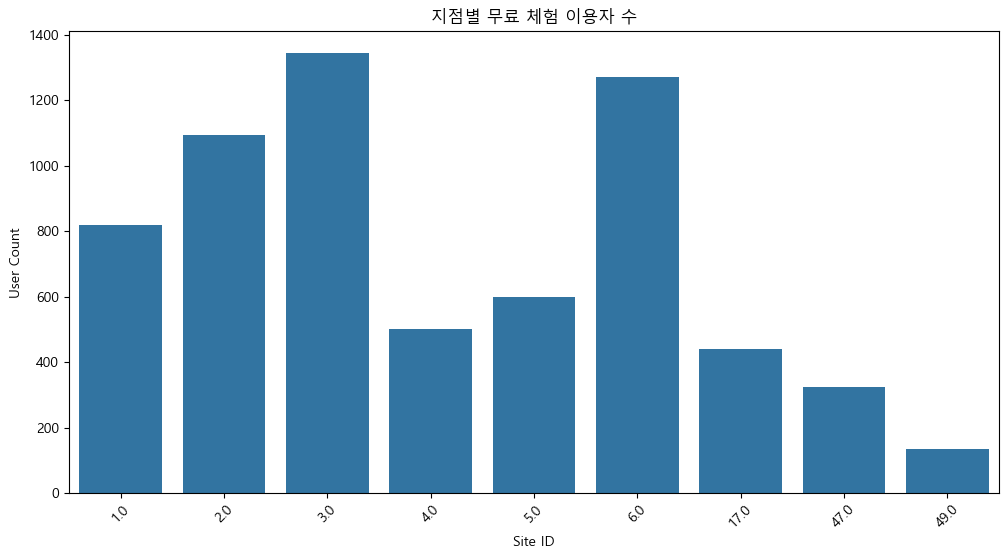

In [66]:
# site_id별 count 계산
site_counts = conversion_df['site_id'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=site_counts.index, y=site_counts.values)

# 그래프 설정
plt.xlabel("Site ID")
plt.ylabel("User Count")
plt.title("지점별 무료 체험 이용자 수")
plt.xticks(rotation=45)  # 가독성을 위해 X축 라벨 회전

plt.show()


### 5. trial_access_log: 3일 체험 신청자 출입 기록

In [67]:
trial_access_log = trial_access_log.drop('id', axis = 1)

In [68]:
trial_access_log.head()

,checkin,cdate,site_id,user_uuid
0,1,2023-07-07 07:11:55.201673,49,cacd0adb-2c87-450f-8a00-2b2ea6b8fa89
1,2,2023-07-06 15:15:58.761284,49,cacd0adb-2c87-450f-8a00-2b2ea6b8fa89
2,2,2023-07-07 14:10:41.848998,49,cacd0adb-2c87-450f-8a00-2b2ea6b8fa89
3,1,2023-07-06 13:09:48.758097,49,cacd0adb-2c87-450f-8a00-2b2ea6b8fa89
4,1,2023-07-07 10:12:42.083352,49,cacd0adb-2c87-450f-8a00-2b2ea6b8fa89


In [69]:
trial_access_log['site_id'] = trial_access_log['site_id'].astype(str)
# trial_access_log['checkin'] = trial_access_log['checkin'].astype(str) 
trial_access_log['cdate'] = pd.to_datetime(trial_access_log['cdate'])
trial_access_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63708 entries, 0 to 63707
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   checkin    63708 non-null  int64         
 1   cdate      63708 non-null  datetime64[ns]
 2   site_id    63708 non-null  object        
 3   user_uuid  63708 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.9+ MB


In [70]:
trial_access_log.isna().sum()

checkin      0
cdate        0
site_id      0
user_uuid    0
dtype: int64

In [71]:
# 중복 확인
trial_access_log.duplicated().sum()

359

In [72]:
trial_access_log[['cdate','user_uuid']].duplicated().sum()

359

In [73]:
trial_access_log = trial_access_log.drop_duplicates()

In [74]:
trial_visit_info[trial_visit_info['user_uuid'] == '000590dc-046f-462b-8225-4c81a97b7166']

,site_id,date,stay_time,stay_time_second,first_enter_time,last_leave_time,user_uuid,stay_time_hour,enter_hour,leave_hour,is_payment,weekday
9212,6,2023-09-05,0 days 05:56:57.911500,21417,2023-09-05 11:57:01.148452,2023-09-05 17:59:45.443621,000590dc-046f-462b-8225-4c81a97b7166,6,11,17,0,Tuesday


- first_enter_time보다 첫 외출 시각이 한참 앞선 것으로 보아 cdate의 시간대가 UTC인 것으로 추정된다. 

In [75]:
trial_access_log['cdate'] = trial_access_log['cdate'] + pd.Timedelta(hours = 9)

In [76]:
trial_access_log.sort_values(by = ['user_uuid','cdate']).head(20)

,checkin,cdate,site_id,user_uuid
52010,1,2023-09-05 11:57:01.695334,6,000590dc-046f-462b-8225-4c81a97b7166
52014,2,2023-09-05 13:24:05.907486,6,000590dc-046f-462b-8225-4c81a97b7166
52009,1,2023-09-05 13:27:46.318391,6,000590dc-046f-462b-8225-4c81a97b7166
52013,2,2023-09-05 16:14:07.010936,6,000590dc-046f-462b-8225-4c81a97b7166
52011,1,2023-09-05 16:16:13.012870,6,000590dc-046f-462b-8225-4c81a97b7166
52012,2,2023-09-05 17:59:45.973499,6,000590dc-046f-462b-8225-4c81a97b7166
24202,1,2021-09-30 16:31:14.861813,3,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c
24208,2,2021-09-30 16:39:16.035267,3,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c
24198,1,2021-09-30 16:39:34.733779,3,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c
24194,2,2021-09-30 16:41:07.572718,3,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c


- 최초 입실 기록과 첫 기록이 밀리초 단위가 차이나는 것으로 보아 최초 입실 후 첫 기록이 입장 기록이다. 
- 즉, 1이 복귀, 2가 외출이다.
- 그럼 동일 날짜에 대해 첫 기록과 마지막 기록은 입퇴실 시간에 포함되니 출입시간대 파악에 방해가 된다.
- 최초 입퇴실을 제외한 시각화를 해보자 
- 지점도 고려해서

In [77]:
# cdate에서 날짜 부분만 추출하여 새로운 열 생성
trial_access_log['date'] = trial_access_log['cdate'].dt.date

# user_uuid, site_id, date 별로 정렬
trial_access_log = trial_access_log.sort_values(by=['user_uuid', 'site_id', 'date', 'cdate'])

# 각 그룹에서 첫 번째와 마지막 행을 제외한 중간 행만 선택
def exclude_first_last(group):
    if len(group) <= 2:
        return pd.DataFrame()  # 두 개 이하의 기록만 있는 경우 빈 데이터프레임 반환
    return group.iloc[1:-1]  # 첫 번째와 마지막 기록 제외

trial_access_log2 = trial_access_log.groupby(['user_uuid', 'site_id', 'date']).apply(exclude_first_last).reset_index(drop=True)

trial_access_log2.head(20)

,checkin,cdate,site_id,user_uuid,date
0,2.0,2023-09-05 13:24:05.907486,6,000590dc-046f-462b-8225-4c81a97b7166,2023-09-05
1,1.0,2023-09-05 13:27:46.318391,6,000590dc-046f-462b-8225-4c81a97b7166,2023-09-05
2,2.0,2023-09-05 16:14:07.010936,6,000590dc-046f-462b-8225-4c81a97b7166,2023-09-05
3,1.0,2023-09-05 16:16:13.012870,6,000590dc-046f-462b-8225-4c81a97b7166,2023-09-05
4,2.0,2021-09-30 16:39:16.035267,3,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,2021-09-30
5,1.0,2021-09-30 16:39:34.733779,3,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,2021-09-30
6,2.0,2021-09-30 16:41:07.572718,3,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,2021-09-30
7,1.0,2021-09-30 16:42:41.122249,3,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,2021-09-30
8,2.0,2021-09-30 17:42:25.154575,3,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,2021-09-30
9,1.0,2021-09-30 17:43:04.596366,3,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,2021-09-30


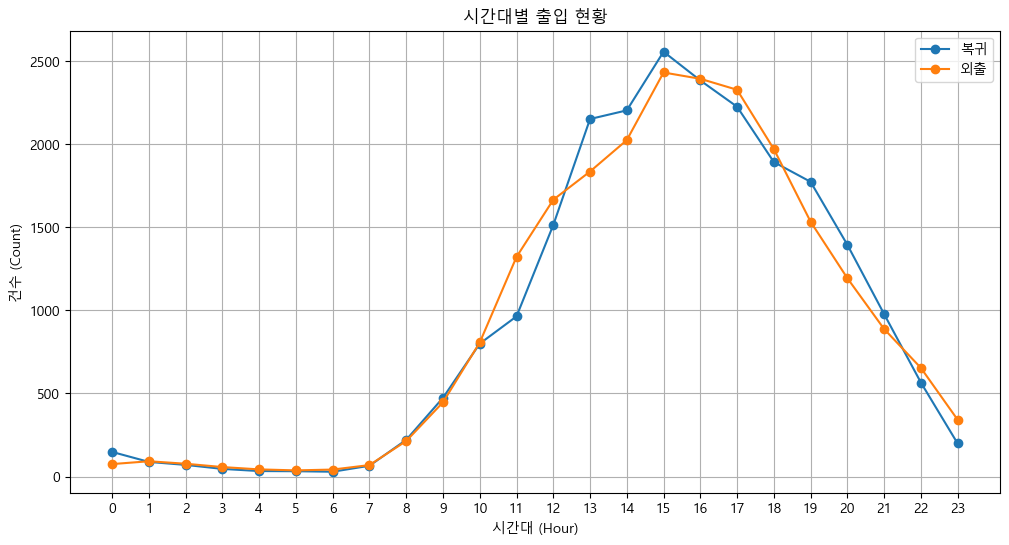

In [78]:
# 1. cdate에서 시간대(hour) 추출
trial_access_log2['hour'] = trial_access_log2['cdate'].dt.hour

# 2. checkin 값 매핑 (1 = 입실, 2 = 퇴실)
trial_access_log2['checkin_type'] = trial_access_log2['checkin'].map({1: '복귀', 2: '외출'})

# 3. 시간대별 입실/퇴실 카운트 집계
hourly_counts = trial_access_log2.groupby(['hour', 'checkin_type']).size().reset_index(name='count')

# 4. 시각화
plt.figure(figsize=(12, 6))

for checkin_type in ['복귀', '외출']:
    subset = hourly_counts[hourly_counts['checkin_type'] == checkin_type]
    plt.plot(subset['hour'], subset['count'], label=checkin_type, marker='o')

plt.xticks(range(24))
plt.xlabel('시간대 (Hour)')
plt.ylabel('건수 (Count)')
plt.title('시간대별 출입 현황')
plt.legend()
plt.grid(True)

plt.show()

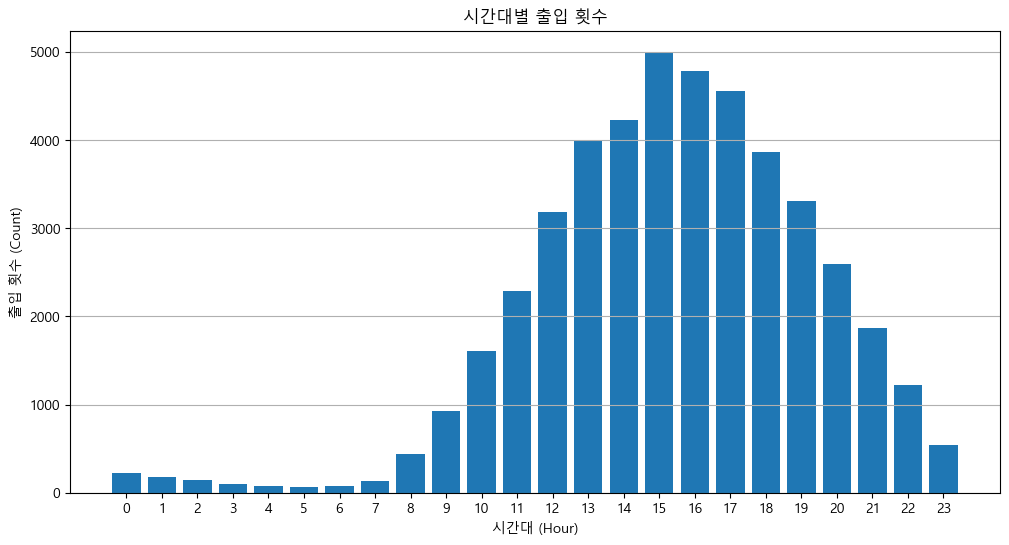

In [79]:
# 시간대별 전체 입퇴실 횟수 집계
hourly_counts = trial_access_log2['hour'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(hourly_counts.index, hourly_counts.values)

plt.xticks(range(24))
plt.xlabel('시간대 (Hour)')
plt.ylabel('출입 횟수 (Count)')
plt.title('시간대별 출입 횟수')
plt.grid(axis='y')

plt.show()


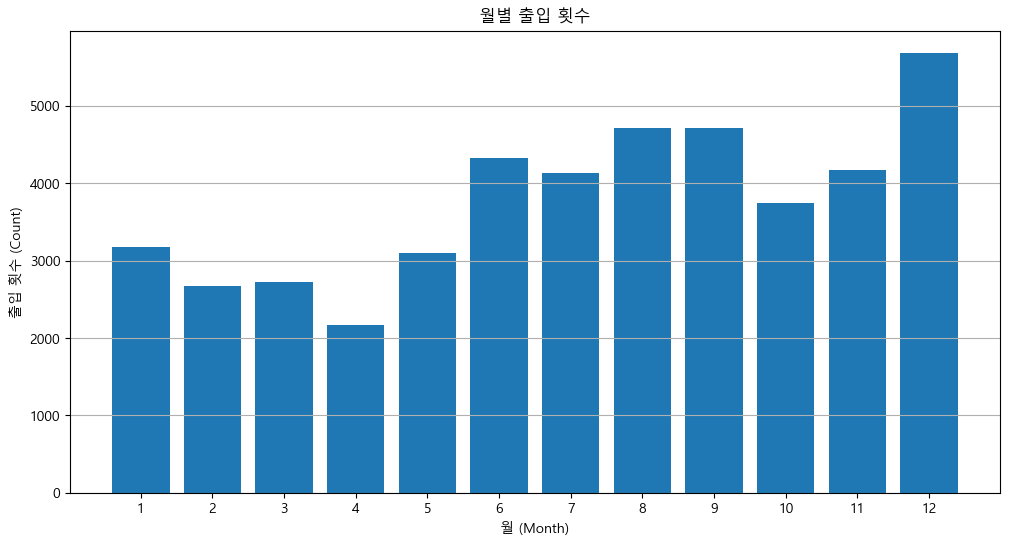

In [80]:
# cdate에서 월 정보 추출
trial_access_log2['month'] = trial_access_log2['cdate'].dt.month

# 월별 입퇴실 횟수 집계
monthly_counts = trial_access_log2['month'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts.index, monthly_counts.values)

plt.xticks(monthly_counts.index)
plt.xlabel('월 (Month)')
plt.ylabel('출입 횟수 (Count)')
plt.title('월별 출입 횟수')
plt.grid(axis='y')

plt.show()


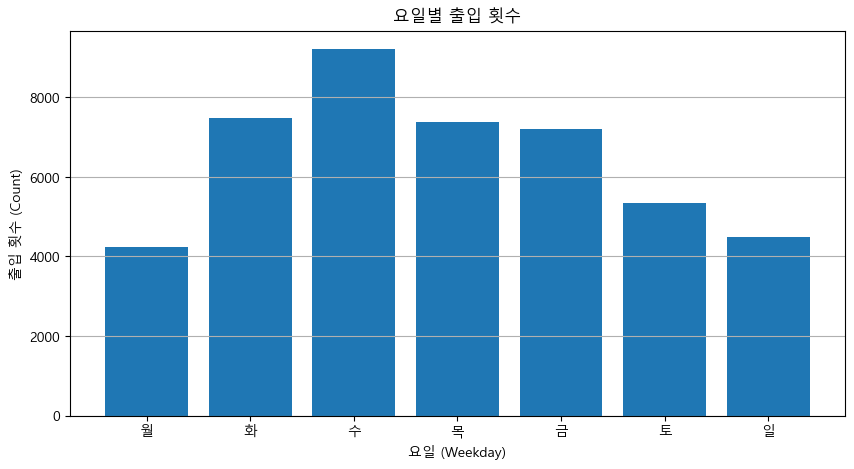

In [81]:
# 요일 컬럼 추가 (0=월, 1=화, ..., 6=일)
trial_access_log2['weekday'] = trial_access_log2['cdate'].dt.dayofweek

# 요일 이름 매핑 (보기 편하게)
weekday_map = {
    0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'
}
trial_access_log2['weekday_name'] = trial_access_log2['weekday'].map(weekday_map)

# 요일별 입퇴실 횟수 집계
weekday_counts = trial_access_log2['weekday_name'].value_counts().reindex(['월', '화', '수', '목', '금', '토', '일'])

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(weekday_counts.index, weekday_counts.values)

plt.xlabel('요일 (Weekday)')
plt.ylabel('출입 횟수 (Count)')
plt.title('요일별 출입 횟수')
plt.grid(axis='y')

plt.show()


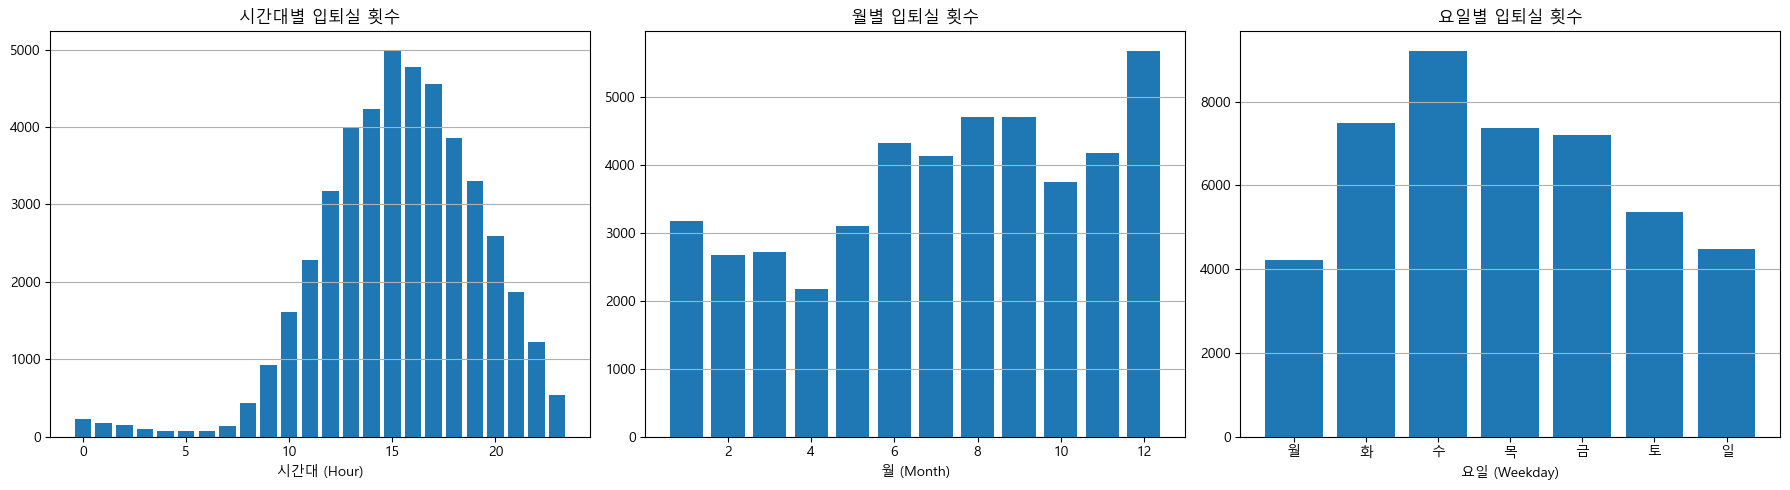

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 시간대별 시각화
hourly_counts = trial_access_log2['cdate'].dt.hour.value_counts().sort_index()
axes[0].bar(hourly_counts.index, hourly_counts.values)
axes[0].set_title('시간대별 입퇴실 횟수')
axes[0].set_xlabel('시간대 (Hour)')
axes[0].grid(axis='y')

# 월별 시각화
monthly_counts = trial_access_log2['cdate'].dt.month.value_counts().sort_index()
axes[1].bar(monthly_counts.index, monthly_counts.values)
axes[1].set_title('월별 입퇴실 횟수')
axes[1].set_xlabel('월 (Month)')
axes[1].grid(axis='y')

# 요일별 시각화
axes[2].bar(weekday_counts.index, weekday_counts.values)
axes[2].set_title('요일별 입퇴실 횟수')
axes[2].set_xlabel('요일 (Weekday)')
axes[2].grid(axis='y')

plt.tight_layout()
plt.show()


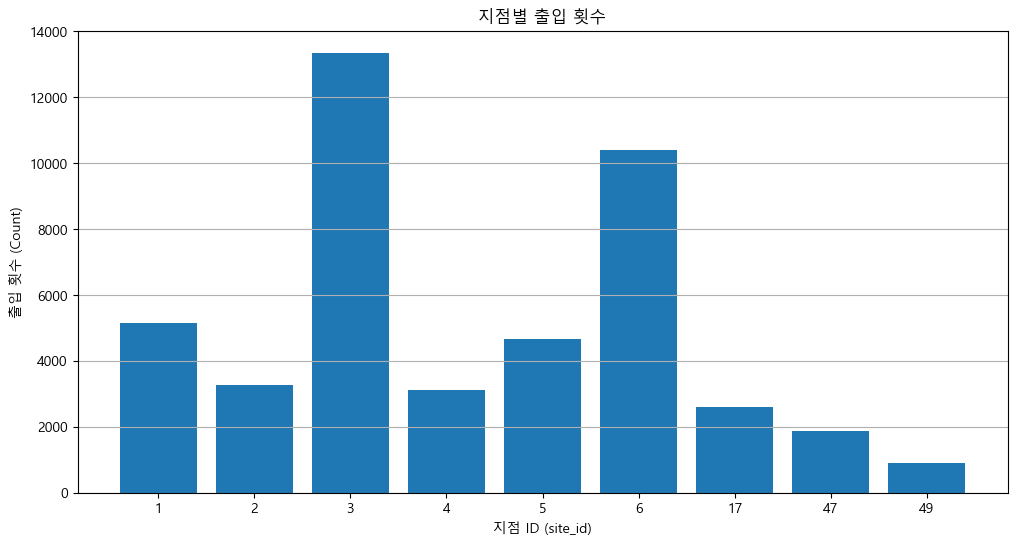

In [83]:
# 지점번호 문자열로 변환
trial_access_log2['site_id'] = trial_access_log2['site_id'].astype(str)

# 지점별 출입 횟수 집계 
site_counts = trial_access_log2['site_id'].value_counts()

# 지정 순서대로 정렬 (누락된 지점은 0 처리)
desired_order = ['1', '2', '3', '4', '5', '6', '17', '47', '49']
site_counts = site_counts.reindex(desired_order, fill_value=0)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(site_counts.index, site_counts.values)

plt.xlabel('지점 ID (site_id)')
plt.ylabel('출입 횟수 (Count)')
plt.title('지점별 출입 횟수') # 지점 ID가 길 경우 기울여서 표시
plt.grid(axis='y')

plt.show()


In [84]:
# user_uuid별 입퇴실 횟수 집계
user_counts = trial_access_log2['user_uuid'].value_counts().reset_index()
user_counts.columns = ['user_uuid', 'count']

# 상위 10명 
user_counts.head(10)

user_counts.describe()

,count
count,4926.000000
mean,9.207877
std,8.513795
min,1.000000
25%,4.000000
50%,6.000000
75%,12.000000
max,74.000000


- 외출,복귀 더블 체크 되었으므로 외출 횟수는 최대 37회였다. 

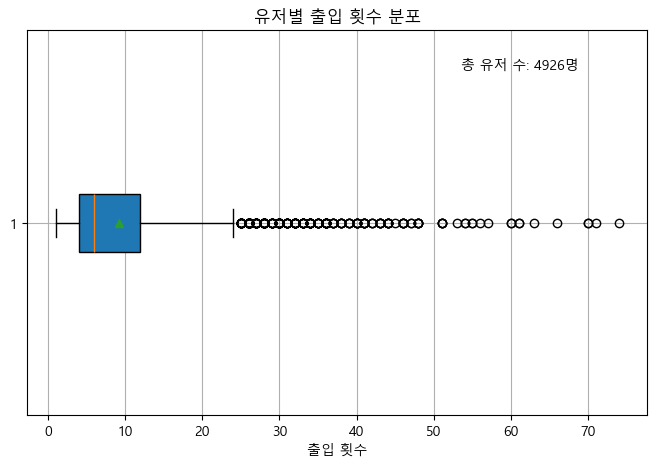

In [85]:
# 유저별 출입 횟수 계산
user_checkin_counts = trial_access_log2.groupby('user_uuid').size()

# 박스플롯 그리기
plt.figure(figsize=(8, 5))
plt.boxplot(user_checkin_counts, vert=False, patch_artist=True, showmeans=True)

# 플롯 설정
plt.title('유저별 출입 횟수 분포')
plt.xlabel('출입 횟수')
plt.grid(True)

# 유저 수 표시
plt.annotate(f'총 유저 수: {len(user_checkin_counts)}명', xy=(0.7, 0.9), xycoords='axes fraction')

plt.show()

-------------
시기별 유료전환율 계산하기

- 무료이용권으로 여러 지점 이용 가능했으므로 지점 아이디는 필요가 없네 
- trial_register에서 trial_date를 가져와야겠다. 
- 가정: 유료 결제는는 무료이용권 신청 후 그 달 안에 진행했다.

In [86]:
# visit_info와 payment 데이터셋 합친 뒤 불필요한 데이터 삭제한 상태 
conversion_df_1

,is_payment,user_uuid,site_id,date
0,0,000590dc-046f-462b-8225-4c81a97b7166,6.0,2023-09-05
1,0,000a5d24-2da9-4c51-8a2b-ea3caba1553b,NaN,NaN
2,1,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,3.0,2021-10-02
3,1,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,3.0,2021-10-01
4,1,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,3.0,2021-09-30
...,...,...,...,...
14562,0,ffd287bc-2797-4788-82fa-6268c82e7fa9,6.0,2023-04-07
14563,1,ffd880d5-0200-44e1-91db-7df9483f2a39,NaN,NaN
14564,0,ffe3911c-ddaf-430e-a940-21a67faa42cb,NaN,NaN
14565,1,fff65ad8-70cf-434e-8d72-e7d9cc61afd4,NaN,NaN


In [87]:
# 무료이용권 신청 날짜 데이터 병합하기
conversion_df_2 = conversion_df_1.merge(trial_register, on='user_uuid', how='left')
conversion_df_2 = conversion_df_2.drop(['year_month','day_of_week','is_weekend'], axis = 1)
conversion_df_2.sort_values(by ='trial_date')

,is_payment,user_uuid,site_id,date,trial_date
9188,1,9f5e2bd3-65c9-4800-84c1-f5c93f44d096,NaN,NaN,2021-05-01
13817,1,f25078d1-1030-485c-85c5-dc82d6987043,NaN,NaN,2021-05-01
7649,1,844319ff-cd15-4633-9900-6eaf4dc68b68,NaN,NaN,2021-05-01
14399,1,fce967b5-070c-46ed-a5fa-ef7d298cc7aa,1.0,2021-05-03,2021-05-01
10776,1,badbde4d-886b-4992-a8e3-fd0c05640183,NaN,NaN,2021-05-01
...,...,...,...,...,...
9971,0,acf3e288-4487-492b-9477-df149fb72e83,6.0,2024-01-01,2023-12-31
9972,0,acf3e288-4487-492b-9477-df149fb72e83,6.0,2024-01-01,2023-12-31
940,1,0e58ea5a-ebe4-48cb-b31b-d02a4f350cf8,3.0,2024-01-01,2023-12-31
941,1,0e58ea5a-ebe4-48cb-b31b-d02a4f350cf8,3.0,2023-12-31,2023-12-31


In [88]:
conversion_df_2[conversion_df_2['user_uuid'].duplicated(keep = False)]

,is_payment,user_uuid,site_id,date,trial_date
2,1,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,3.0,2021-10-02,2021-09-29
3,1,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,3.0,2021-10-01,2021-09-29
4,1,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,3.0,2021-09-30,2021-09-29
6,0,0018e22d-a2cc-4e06-bca2-d6a041770f3b,6.0,2023-11-16,2023-11-14
7,0,0018e22d-a2cc-4e06-bca2-d6a041770f3b,6.0,2023-11-15,2023-11-14
...,...,...,...,...,...
14557,0,ffcb7950-d150-40ae-a6bf-f85f5c2b9702,2.0,2022-04-27,2022-04-25
14558,0,ffcb7950-d150-40ae-a6bf-f85f5c2b9702,2.0,2022-04-26,2022-04-25
14560,0,ffd287bc-2797-4788-82fa-6268c82e7fa9,6.0,2023-04-09,2023-04-06
14561,0,ffd287bc-2797-4788-82fa-6268c82e7fa9,6.0,2023-04-08,2023-04-06


In [89]:
# 선우님이 찍어주신 월별 유료전환율
monthly_is_payment = pd.read_csv('./data/month_is_payment.csv')
monthly_is_payment

,year_month,is_payment
0,2021.05,0.503546
1,2021.06,0.529595
2,2021.07,0.434174
3,2021.08,0.384181
4,2021.09,0.397516
5,2021.10,0.434164
6,2021.11,0.392500
7,2021.12,0.349544
8,2022.01,0.362110
9,2022.02,0.402985


## 전환율 차이 분석 

In [90]:
import numpy as np
from scipy.stats import norm

# 데이터 입력
n1 = 6534   # 실제 이용자 수
x1 = 2564   # 실제 이용자 중 유료 전환자 수
p1 = x1 / n1

n2 = 3090   # 미사용자 수
x2 = 1088   # 미사용자 중 유료 전환자 수
p2 = x2 / n2

# 표준오차 계산
se = np.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))

# Z값 계산
z = (p1 - p2) / se

# -----------------------------
# [1] 양측 검정 (p1 ≠ p2)
p_value_two_sided = 2 * (1 - norm.cdf(abs(z)))

# -----------------------------
# [2] 단측 검정 (p1 > p2)
p_value_one_sided = 1 - norm.cdf(z)

# 결과 출력
print(f"실제 이용자 전환율: {p1:.4f}")
print(f"미사용자 전환율: {p2:.4f}")
print(f"Z 값: {z:.4f}")

# 양측 검정 결과
print("\n[양측 검정 결과] p1 ≠ p2")
print(f"p-value (양측): {p_value_two_sided:.8f}")
if p_value_two_sided < 0.05:
    print("결론: 두 집단의 전환율 차이는 유의미하다.")
else:
    print("결론: 두 집단의 전환율 차이는 유의미하지 않다.")

# 단측 검정 결과
print("\n[단측 검정 결과] p1 > p2")
print(f"p-value (단측): {p_value_one_sided:.8f}")
if p_value_one_sided < 0.05:
    print("결론: 실제 이용자의 전환율이 미사용자보다 유의미하게 더 높다.")
else:
    print("결론: 실제 이용자의 전환율이 미사용자보다 유의미하게 높다고 보기 어렵다.")


실제 이용자 전환율: 0.3924
미사용자 전환율: 0.3521
Z 값: 3.8374

[양측 검정 결과] p1 ≠ p2
p-value (양측): 0.00012432
결론: 두 집단의 전환율 차이는 유의미하다.

[단측 검정 결과] p1 > p2
p-value (단측): 0.00006216
결론: 실제 이용자의 전환율이 미사용자보다 유의미하게 더 높다.


In [91]:
import numpy as np
from scipy.stats import norm

# 데이터 입력
n1 = 6534   # 실제 이용자 수
x1 = 2564   # 실제 이용자 중 유료 전환자 수
p1 = x1 / n1

n2 = 3090   # 미사용자 수
x2 = 1088   # 미사용자 중 유료 전환자 수
p2 = x2 / n2

# 표준오차 계산
se = np.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))

# Z값 계산
z = (p1 - p2) / se

# -----------------------------
# [1] 양측 검정 (p1 ≠ p2)
p_value_two_sided = 2 * (1 - norm.cdf(abs(z)))

# -----------------------------
# [2] 단측 검정 (p1 > p2)
p_value_one_sided = 1 - norm.cdf(z)

# 결과 출력
print(f"Z 값: {z:.4f}")

# 양측 검정 결과
print("\n[양측 검정 결과] p1 ≠ p2")
print(f"p-value : {p_value_two_sided:.8f}")

# 단측 검정 결과
print("\n[단측 검정 결과] p1 > p2")
print(f"p-value : {p_value_one_sided:.8f}")


Z 값: 3.8374

[양측 검정 결과] p1 ≠ p2
p-value : 0.00012432

[단측 검정 결과] p1 > p2
p-value : 0.00006216
